In [1]:
#MNIST Handwritten digits classification Using Neural Network

#url :: https://keras.io/api/datasets/mnist/

In [2]:
#Importing the Dependencies
import numpy as numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2                        # Open CV library for image Recognition
from google.colab.patches import cv2_imshow #to display an image in google collab
from PIL import Image             # Pillow for image processing
import tensorflow as tf
tf.random.set_seed(3)             # Each time you train NN, NN has different accuracy....this will help to fixed it
from tensorflow import keras      
from keras.datasets import mnist   #Importing the data
from tensorflow.math import confusion_matrix 

Loading MNIST Data from keras.datset

In [3]:
#Here we already have the processed data(Already converted to numpy array) and already divided into training and testing data

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Each Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [7]:
print(X_train[11]) # printing 11th image :: type : numpy(0-255)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [8]:
X_train[11].shape

(28, 28)

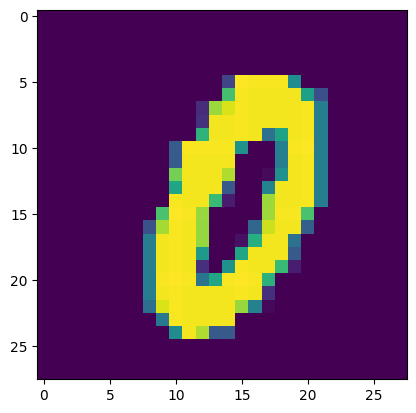

Corresponding labels or output class : 0


In [9]:
#Displaying the Image
plt.imshow(X_train[34])
plt.show()

#printing the corresponding labels
print("Corresponding labels or output class :", Y_train[34])

In [10]:
#Unique values in Y_train
print(np.unique(Y_train))  
print(np.unique(Y_test))  

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#We can use this labels as it is   or we can apply One Hot Encoding 


In [12]:
#All the images have the same dimensions in the dataset, if not we have to resize all the images to a common dimension

In [13]:
#Scaling the values #Since all the values ranging from 0 t0 255
#we convert to range of 0 to 1 without changing the information so that our model performs well

In [14]:
#Scaling :: Dividing by 255 so that the value ranges from 0 to 1
X_train = X_train/255
X_test = X_test/255

In [15]:
X_test[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Buildiing the Neural Network

In [16]:
#Setting up the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),      #input layer shape is image dimension
                          keras.layers.Dense(50, activation='relu'),      #!st hidden layers 50 : no. of neurons
                          keras.layers.Dense(50, activation='relu'),      #2nd hidden layers
                          keras.layers.Dense(10, activation='sigmoid')    #output layers: 10 neurons: no. of classes in output labels
])

In [17]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.2928 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0991 - accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0784 - accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0558 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9846
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

In [19]:
#Early stopping, stops the training when accuracy remains constant so that it doesnot cover all the epochs
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)


In [22]:
model_history=model.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks = early_stopping)

Epoch 1/100
4020/4020 [==============================] - 17s 4ms/step - loss: 0.0595 - accuracy: 0.9807 - val_loss: 0.0563 - val_accuracy: 0.9821
Epoch 2/100
4020/4020 [==============================] - 19s 5ms/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 3/100
4020/4020 [==============================] - 19s 5ms/step - loss: 0.0383 - accuracy: 0.9868 - val_loss: 0.0794 - val_accuracy: 0.9778
Epoch 4/100
4020/4020 [==============================] - 18s 5ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 5/100
4020/4020 [==============================] - 15s 4ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 6/100
4020/4020 [==============================] - 17s 4ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0757 - val_accuracy: 0.9804
Epoch 7/100
4020/4020 [==============================] - 17s 4ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0960 -

In [24]:
# After 21 Epochs our model stops training

Training data Accuracy = 99.5%


In [25]:
#Test data Accuracy
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1954 - accuracy: 0.9721
0.972100019454956


Test data Accuracy = 97.2%


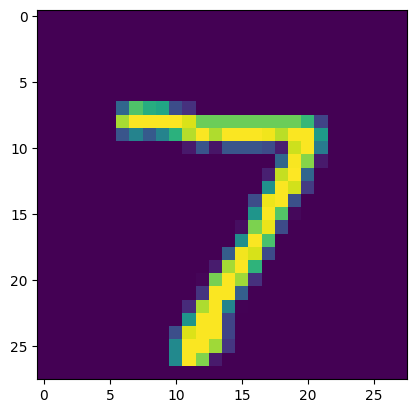

In [26]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [27]:
print(Y_test[0])

7


In [30]:
#Testing our model
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [31]:
print(Y_pred.shape)

(10000, 10)


In [29]:
print(Y_pred[0])

#We get the prediction probability

[2.3888469e-04 2.9826936e-07 1.0279286e-08 1.0309492e-05 2.2302051e-04
 5.6411992e-08 1.2199136e-15 1.0000000e+00 2.1762951e-08 9.0230840e-01]


In [33]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [34]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 3, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

In [35]:
# Y_test  -->  True labels

# Y_pred_labels  -->  Predicted Labels

Confusion Matrix

In [36]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels) # tensorflow.math

In [37]:
print(conf_mat)

tf.Tensor(
[[ 966    0    0    1    3    3    5    0    0    2]
 [   0 1117    5    2    0    1    3    2    5    0]
 [   7    2  999    2    1    0    2    5   14    0]
 [   1    0   11  978    1    7    0    5    5    2]
 [   0    0    2    0  959    0   10    2    1    8]
 [   4    0    0  113    2  758    9    2    3    1]
 [   4    1    0    1    4    6  938    0    4    0]
 [   3    3   15    4    2    2    0  991    4    4]
 [   8    0    4    3    4    5    8    5  932    5]
 [   2    3    0    3   16    6    1    4    1  973]], shape=(10, 10), dtype=int32)


Text(0.5, 1.0, 'Correct prediction class made by our Model w.r.t. original class')

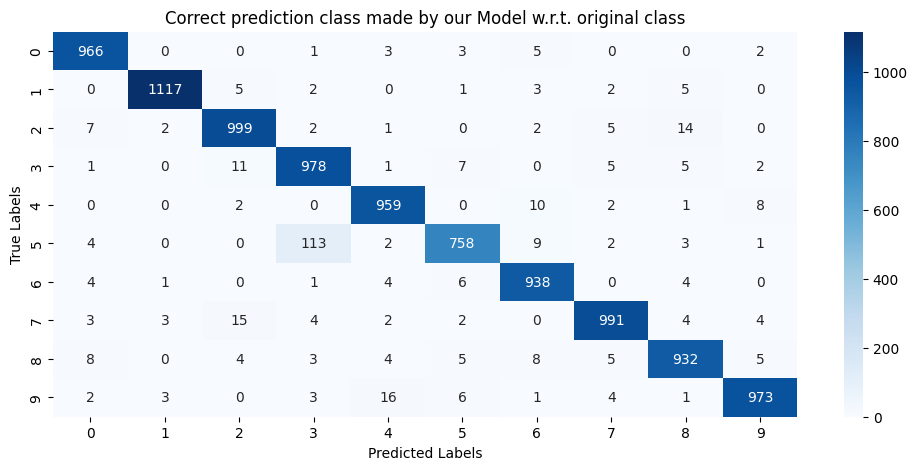

In [46]:
plt.figure(figsize=(12,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Correct prediction class made by our Model w.r.t. original class')


# All the values in the diagonals are comparison between true and predicted output
# 1000 is highest :: So nearer to it is good prediction

Building a Predictive System

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [47]:
input_image = cv2.imread("/content/image.png")

In [51]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

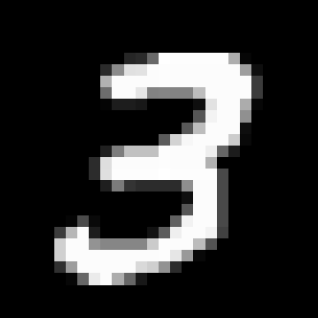

In [53]:
cv2_imshow(input_image)

In [54]:
input_image.shape

#The image is black and white but 
#it gives image as RGB image

#We have trained the images in grayscale, dimension (28,28), Scaled

#we have to convert it to grayscale
#Also to training dimension (28,28)
#Also scaling is required



(318, 318, 3)

In [55]:
#convert it to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [56]:
grayscale.shape

(318, 318)

In [58]:
input_image_resize = cv2.resize(grayscale, (28, 28)) #Resizing the image to the dimension of 28,28

In [59]:
input_image_resize.shape

(28, 28)

In [60]:
cv2_imshow(input_image_resize)

In [61]:
#Scaling the image
input_image_resize = input_image_resize/255

In [62]:
type(input_image_resize)

numpy.ndarray

In [63]:
#Reshape: Telling the neural network that we are prediciting the value for one image
image_reshaped = np.reshape(input_image_resize, [1,28,28])  

In [65]:
input_prediction = model.predict(image_reshaped)
print(input_prediction) 

1/1 [==============================] - 0s 33ms/step
[[6.0339579e-19 9.2338853e-02 1.9713519e-07 1.0000000e+00 3.9767492e-26
  7.1564001e-01 1.8891150e-30 1.5375459e-02 3.2216241e-04 9.7174823e-01]]


In [66]:
input_pred_label = np.argmax(input_prediction)

In [67]:
print(input_pred_label)

3


Path of the image to be predicted: /content/image.png


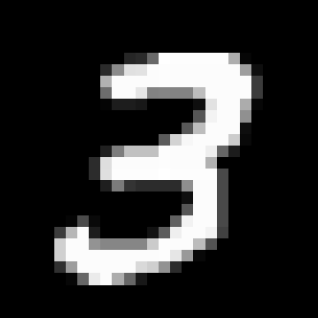

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [69]:
#Prediction in one go : by giving image path to input
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)